In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/kaggle/input/flicktime/rating.csv')

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load data
# data = pd.read_csv('ratings.csv')

# Create user-item matrix
n_users = data.userId.nunique()
n_movies = data.movieId.nunique()

user_ids = data.userId.astype('category').cat.codes.values
movie_ids = data.movieId.astype('category').cat.codes.values
ratings = data.rating.values

user_item_matrix = np.zeros((n_users, n_movies))
for i in range(len(ratings)):
    user_item_matrix[user_ids[i], movie_ids[i]] = ratings[i]

# Define model
embedding_size = 64

user_input = Input(shape=(1,))
user_embed = Embedding(n_users, embedding_size)(user_input)
user_embed = Flatten()(user_embed)

movie_input = Input(shape=(1,))
movie_embed = Embedding(n_movies, embedding_size)(movie_input)
movie_embed = Flatten()(movie_embed)

dot_product = Dot(axes=1)([user_embed, movie_embed])

dense1 = Dense(64, activation='relu')(dot_product)
dropout1 = Dropout(0.2)(dense1)

dense2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)

output = Dense(1)(dropout2)

model = Model(inputs=[user_input, movie_input], outputs=output)
model.compile(loss='mse', optimizer='adam')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
%%time
# Train model
history = model.fit([user_ids, movie_ids], ratings, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
125002/125002 [==============================] - 763s 6ms/step - loss: 0.9823 - val_loss: 1.1984
Epoch 2/5
125002/125002 [==============================] - 709s 6ms/step - loss: 0.8699 - val_loss: 1.2681
Epoch 3/5
125002/125002 [==============================] - 708s 6ms/step - loss: 0.7968 - val_loss: 1.3439
Epoch 4/5
125002/125002 [==============================] - 712s 6ms/step - loss: 0.7381 - val_loss: 1.3314
Epoch 5/5
125002/125002 [==============================] - 718s 6ms/step - loss: 0.6896 - val_loss: 1.4322
CPU times: user 1h 11min 10s, sys: 5min 30s, total: 1h 16min 41s
Wall time: 1h 22s


In [6]:
del data

In [7]:
import gc
gc.collect()

1774

In [8]:
import ctypes
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

1

In [9]:
# Make predictions
user_ids_test = np.random.choice(n_users, 10)
movie_ids_test = np.random.choice(n_movies, 10)

In [10]:
predictions = model.predict([user_ids_test, movie_ids_test]).flatten()
print(predictions)

1/1 [==============================] - 0s 155ms/step
[4.025081  4.1009297 3.4468937 4.053572  3.9025362 4.068873  3.346677
 3.889739  3.972803  4.124611 ]


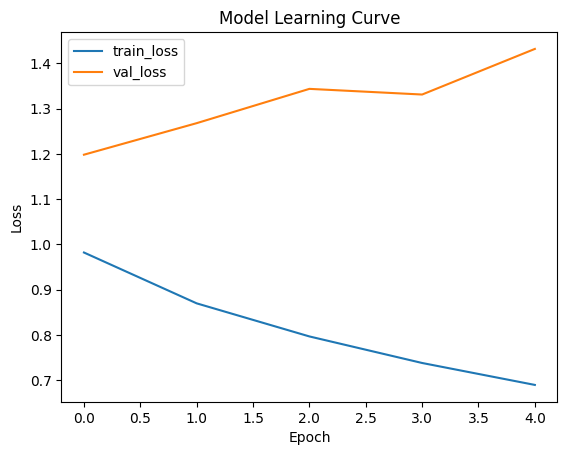

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
import pickle
pickle.dump(model, open('model_rating.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dot
.........vars
......dropout
.........vars
......dropout_1
.........vars
......embedding
.........vars
............0
......embedding_1
.........vars
............0
......flatten
.........vars
......flatten_1
.........vars
......input_layer
.........vars
......input_layer_1
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-10 08:46: